## Load libraries

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import numpy as np
try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [2]:
booking_ids=[13,               
154618822837, 
223338299461,     
395136991308,     
403726925929,     
455266533495,     
481036337234,     
515396075694,     
695784702084,     
919123001348,     
970662608932,     
1279900254294,    
1348619731077,    
1391569403991,    
1408749273124,    
1511828488211,    
1632087572573,    
1649267441751]

In [3]:
label = pd.read_csv('labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv', index_col=None, header=0)

In [4]:
label.drop(label[label.bookingID.isin(booking_ids)].index, inplace=True)

(array([14999.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,  4983.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <a list of 16 Patch objects>)

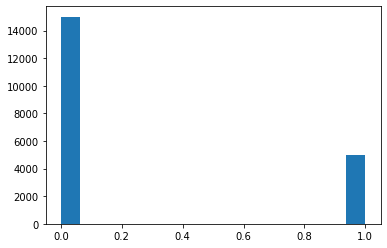

In [5]:
plt.hist(label['label'], bins='auto')

## Load data

In [10]:
features = 'features' 
all_files = glob.glob(features + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

features_frame = pd.concat(li, axis=0, ignore_index=True)


In [11]:
features_frame

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,678604832892,8.000,253.815094,-0.018842,-9.778915,0.141910,0.000004,0.127894,-0.003946,849.0,22.800875
1,197568495666,6.000,46.780491,3.053528,-11.339175,1.049893,-0.228431,0.100745,-0.009538,656.0,8.029377
2,1709396983925,3.000,301.000000,0.567177,9.913507,0.318716,-0.022131,0.011083,0.002845,369.0,0.000000
3,919123001475,3.482,297.000000,3.598595,10.094262,-1.747821,0.002806,0.166651,0.088069,1468.0,3.599888
4,1039382085795,3.210,0.000000,0.466644,8.914932,3.394867,0.002533,0.005173,0.002060,276.0,0.000000
5,137438953558,3.900,93.000000,0.200760,8.569458,3.120728,-0.020660,0.032898,0.025208,580.0,11.310000
6,309237645463,4.000,84.000000,3.875485,7.491802,4.688738,-0.128823,-0.431096,-0.267018,122.0,5.068843
7,962072674369,3.900,70.000000,0.550683,8.648121,2.976084,-0.051165,0.088625,-0.018571,990.0,13.590181
8,1503238553717,3.900,107.000000,1.776552,10.178062,-0.347170,-0.402938,-0.263526,0.173833,1280.0,14.932049
9,128849018933,3.000,0.000000,0.257975,9.191938,3.012504,0.008522,0.001065,-0.012783,35.0,0.000000


In [12]:
features_frame=features_frame[features_frame.bookingID.isin(label.bookingID)]

In [13]:
len(features_frame.bookingID.unique())

19982

In [15]:
features_frame_group=features_frame.sort_values(['bookingID','second'],ascending=True).groupby('bookingID')

In [16]:
features_frame['accel'] =features_frame_group['Speed'].diff()/features_frame_group['second'].diff()

/home/vikash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
features_frame['accel'] = features_frame['accel'].fillna(0)

/home/vikash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
features_frame

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,accel
0,678604832892,8.000,253.815094,-0.018842,-9.778915,0.141910,0.000004,0.127894,-0.003946,849.0,22.800875,0.000000
1,197568495666,6.000,46.780491,3.053528,-11.339175,1.049893,-0.228431,0.100745,-0.009538,656.0,8.029377,-0.097365
2,1709396983925,3.000,301.000000,0.567177,9.913507,0.318716,-0.022131,0.011083,0.002845,369.0,0.000000,0.000000
3,919123001475,3.482,297.000000,3.598595,10.094262,-1.747821,0.002806,0.166651,0.088069,1468.0,3.599888,3.599888
4,1039382085795,3.210,0.000000,0.466644,8.914932,3.394867,0.002533,0.005173,0.002060,276.0,0.000000,0.000000
5,137438953558,3.900,93.000000,0.200760,8.569458,3.120728,-0.020660,0.032898,0.025208,580.0,11.310000,0.150000
6,309237645463,4.000,84.000000,3.875485,7.491802,4.688738,-0.128823,-0.431096,-0.267018,122.0,5.068843,-1.377590
7,962072674369,3.900,70.000000,0.550683,8.648121,2.976084,-0.051165,0.088625,-0.018571,990.0,13.590181,-0.012779
8,1503238553717,3.900,107.000000,1.776552,10.178062,-0.347170,-0.402938,-0.263526,0.173833,1280.0,14.932049,-0.051559
9,128849018933,3.000,0.000000,0.257975,9.191938,3.012504,0.008522,0.001065,-0.012783,35.0,0.000000,0.000000


In [21]:
y = label.sort_values(['bookingID'],ascending=True)

In [22]:
y = y['label']

In [25]:
features_frame_group=features_frame.sort_values(['bookingID','second'],ascending=True)\
.groupby('bookingID')\
.agg(['min', 'max','mean','median','std','var','sum'])


In [29]:
features_frame_group.columns = ["_".join(x) for x in features_frame_group.columns.ravel()]

In [45]:
featute_names=list(features_frame_group.columns)

In [37]:
features_frame_group.head

<bound method NDFrame.head of                Accuracy_min  Accuracy_max  Accuracy_mean  Accuracy_median  \
bookingID                                                                   
0                     4.000        48.000      10.165339           8.0000   
1                     3.000         7.709       3.718763           3.9000   
2                     3.000         8.000       3.930626           3.6340   
4                    10.000        10.000      10.000000          10.0000   
6                     3.000        12.000       4.586721           4.0040   
7                     3.000         3.900       3.681034           3.9000   
8                     3.000        18.204       7.008253           6.0680   
10                    3.000         9.000       3.815000           3.9000   
11                    3.000         8.000       4.222360           3.9000   
14                   16.000        54.000      20.283333          16.0000   
16                    3.000         8.452     

In [40]:
X = features_frame_group.values

In [52]:
len(X[0])==len(featute_names)

True

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [ ]:
# X_train, X_valid, y_train, y_valid = train_test_split(
#     X, y, test_size=0.20, random_state=42)

## Create Dataset object for LightGBM

In [126]:
lgb_train = lgb.Dataset(X_train, y_train,categorical_feature=[])
lgb_test = lgb.Dataset(X_valid, y_valid, reference=lgb_train,categorical_feature=[])

## Configuration dictionary

In [127]:
params = {

    'boosting_type' : 'gbdt',
    'objective':'binary',
    'metric': 'binary_logloss,auc',
    'num_trees':100,
    'learning_rate' :0.1,
    'feature_fraction': 0.8,
    'bagging_freq': 5,
    'bagging_fraction': 0.8,
    'min_data_in_leaf':50,
    'min_sum_hessian_in_leaf':5.0
    
}

## Training

In [128]:
evals_result = {}  # to record eval results for plotting
gbm = lgb.train(params,
                lgb_train,
               
                valid_sets=[lgb_train, lgb_test],
                feature_name=featute_names,
               
                evals_result=evals_result,
                verbose_eval=10,
               early_stopping_rounds=30)

Training until validation scores don't improve for 30 rounds.
[10]	training's auc: 0.773794	training's binary_logloss: 0.482386	valid_1's auc: 0.731106	valid_1's binary_logloss: 0.501323
[20]	training's auc: 0.800075	training's binary_logloss: 0.454415	valid_1's auc: 0.733752	valid_1's binary_logloss: 0.490229
[30]	training's auc: 0.823456	training's binary_logloss: 0.435567	valid_1's auc: 0.733357	valid_1's binary_logloss: 0.487788
[40]	training's auc: 0.844295	training's binary_logloss: 0.41973	valid_1's auc: 0.731108	valid_1's binary_logloss: 0.487974
[50]	training's auc: 0.863009	training's binary_logloss: 0.405779	valid_1's auc: 0.729529	valid_1's binary_logloss: 0.488723
Early stopping, best iteration is:
[22]	training's auc: 0.804583	training's binary_logloss: 0.449978	valid_1's auc: 0.734551	valid_1's binary_logloss: 0.488907


## Plot metrics recorded during training

In [120]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

In [121]:
evals_result

{'training': defaultdict(list,
             {'auc': [0.7289587741873867,
               0.7471285004973223,
               0.7528352560366506,
               0.7552451640293059,
               0.7606333558243711,
               0.7638630420522139,
               0.7666017046482287,
               0.7688777712963635,
               0.7714367127561348,
               0.7737944946091402,
               0.7765328747070076,
               0.7802350024663135,
               0.7827858561087525,
               0.7855702310901809,
               0.7874753358191496,
               0.7908853604940026,
               0.7935431344538005,
               0.7957833552258935,
               0.7980749278834544,
               0.8000750566189064,
               0.8021967851124899,
               0.8045834759425833,
               0.8068427077937096,
               0.8097580049721348,
               0.8119227464243896,
               0.8145736985770715,
               0.8168855483238819,
               0.

In [122]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name='binary_logloss')
else:
    render_metric(params['metric'][0])

interactive(children=(Text(value='binary_logloss', description='metric_name'), Output()), _dom_classes=('widge…

## Plot feature importances

In [123]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=4):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

In [124]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

interactive(children=(Dropdown(description='importance_type', options=('split', 'gain'), value='split'), IntSl…

## Plot split value histogram

In [97]:
def render_histogram(feature):
    ax = lgb.plot_split_value_histogram(gbm, feature=feature,
                                        bins='auto', figsize=(10, 5))
    plt.show()

In [98]:
if INTERACTIVE:
    # create widget for interactive split value histogram
    interact(render_histogram,
             feature=gbm.feature_name())
else:
    render_histogram(feature='f26')

interactive(children=(Dropdown(description='feature', options=('Accuracy_min', 'Accuracy_max', 'Accuracy_mean'…

## Plot trees

In [95]:
def render_tree(tree_index, show_info, precision=4):
    show_info = None if 'None' in show_info else show_info
    return lgb.create_tree_digraph(gbm, tree_index=tree_index,
                                   show_info=show_info, precision=precision)

In [96]:
if INTERACTIVE:
    # create widget to switch between trees and control info in nodes
    interact(render_tree,
             tree_index=(0, gbm.num_trees() - 1),
             show_info=SelectMultiple(  # allow multiple values to be selected
                 options=['None',
                          'split_gain',
                          'internal_value',
                          'internal_count',
                          'leaf_count'],
                 value=['None']),
             precision=(0, 10))
    tree = None
else:
    tree = render_tree(84, ['None'])
tree

interactive(children=(IntSlider(value=49, description='tree_index', max=99), SelectMultiple(description='show_…